In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
#from scipy import special
import scipy.optimize as so
from sympy import *


In [6]:
from functions import *

In [17]:
#PARAMETERS
#________________________________________________________
dx=0.5
dx=1
dX=0.1
limx=100
XX=np.arange(0,limx,dX)
xx=np.arange(0,limx,dx)

    #domaine temporel  (en s)
limt=82*1
dt=1/60
tt=np.arange(0,limt,dt)

#variables 
s=5  #standard dev   gaussian
mu=0   #moyenne gaussienne 
K=0.6  

In [29]:
def euler_f(dx,dt,limt,plot=0):    #euler forward 
    #PARAMETERS
#________________________________________________________
#dx=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,5,10]
    dX=0.1
    limx=100
    XX=np.arange(0,limx,dX)
    xx=np.arange(0,limx,dx)

    #domaine temporel  (en h)
    #limt=240 #10 jours
    #limt=24*5
    #dt=1/60     #minutes
    tt=np.arange(0,limt,dt)

#variables 
    s=5  #standard dev   gaussian
    mu=0   #moyenne gaussienne 
    K=0.6
#_________________________________

    Tf=np.zeros((len(tt),len(xx)))
    #Tf[0,:]=gauss(xx, mu, s)
    
    #Conditions aux limites 
    Tf[:,0]=temp_cycle(tt,dt)
    #Tf[:,-1]=np.zeros(len(tt))

    for i in range(0,len(tt)-1):
        for j in range(1,len(xx)-1):
            Tf[i+1,j]=Tf[i,j]+(K*dt/(dx**2))*(Tf[i,j+1]+Tf[i,j-1]-2*Tf[i,j])
        if plot==1:
            if i%24==0:
                plt.plot(xx,Tf[i,:],label='t='+str(i)+' h')
                plt.legend()
                plt.xlabel('Space domain (cm)')
                plt.ylabel('Température')
                plt.grid()
                plt.title('Heat diffusion')
    return Tf
    

Text(0.5, 1.0, 'Heat diffusion')

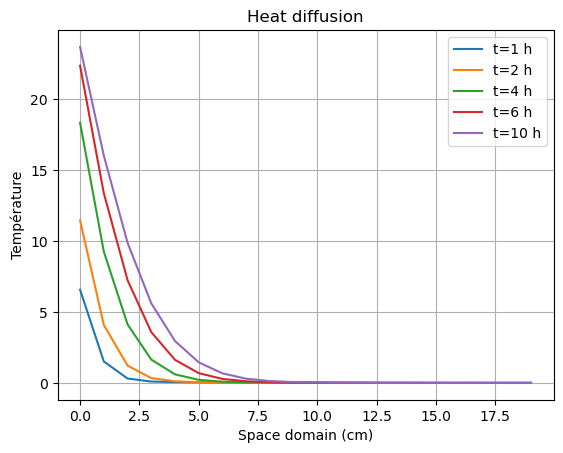

In [28]:
Tf=euler_f(dx,dt,limt,plot=0)
plt.plot(xx[0:20],Tf[1*60,0:20],label='t='+str(1)+' h')
plt.plot(xx[0:20],Tf[2*60,0:20],label='t='+str(2)+' h')
plt.plot(xx[0:20],Tf[4*60,0:20],label='t='+str(4)+' h')
plt.plot(xx[0:20],Tf[6*60,0:20],label='t='+str(6)+' h')
plt.plot(xx[0:20],Tf[8*60,0:20],label='t='+str(10)+' h')
plt.legend()
plt.xlabel('Space domain (cm)')
plt.ylabel('Température')
plt.grid()
plt.title('Heat diffusion')

Text(0.5, 1.0, 'Heat diffusion')

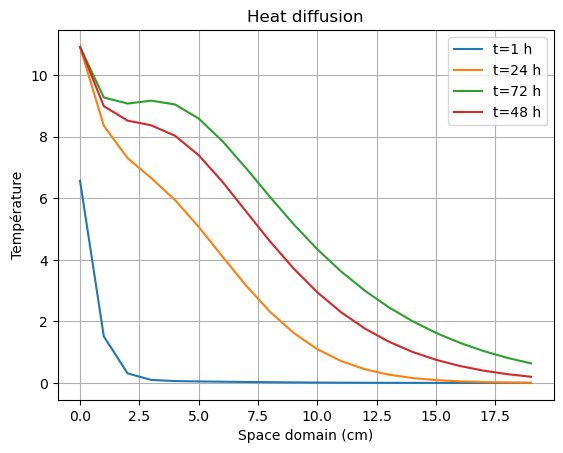

In [26]:
plt.plot(xx[0:20],Tf[1*60,0:20],label='t='+str(1)+' h')
plt.plot(xx[0:20],Tf[24*60,0:20],label='t='+str(24)+' h')
plt.plot(xx[0:20],Tf[72*60,0:20],label='t='+str(72)+' h')
plt.plot(xx[0:20],Tf[48*60,0:20],label='t='+str(48)+' h')
plt.legend()
plt.xlabel('Space domain (cm)')
plt.ylabel('Température')
plt.grid()
plt.title('Heat diffusion')

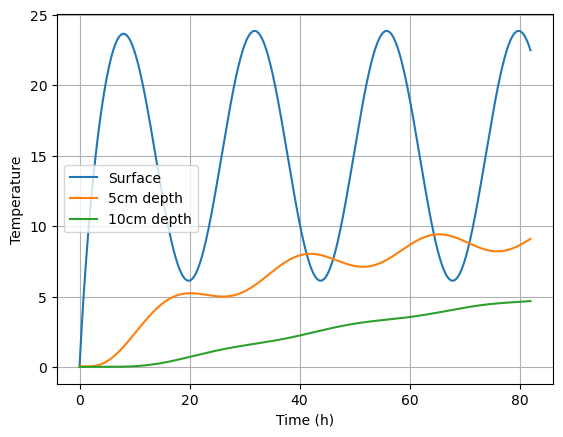

In [27]:
plt.plot(tt,Tf[:,0],label='Surface')
plt.plot(tt,Tf[:,5],label='5cm depth')
plt.plot(tt,Tf[:,10],label='10cm depth')

plt.legend()
plt.xlabel('Time (h)')
plt.ylabel('Temperature')
plt.grid()